## Análisis Discriminante Lineal (LDA)

El Análisis Discriminante Lineal (LDA) es una técnica estadística y de aprendizaje automático ampliamente utilizada para la clasificación de datos. Se basa en encontrar una combinación lineal de variables que maximice la separación entre las clases conocidas, permitiendo así clasificar nuevos datos de forma eficiente.

**Importancia en IA:**

LDA desempeña un papel crucial en el campo de la Inteligencia Artificial (IA) debido a sus sólidas capacidades de clasificación y su relativa simplicidad. Entre sus principales ventajas se encuentran:

* **Efectividad:** LDA es capaz de lograr altas tasas de precisión en la clasificación de datos, especialmente cuando las clases están bien separadas.
* **Interpretabilidad:** LDA proporciona una representación lineal de las variables discriminantes, lo que facilita la comprensión de la base de la clasificación.
* **Eficiencia computacional:** LDA es un algoritmo relativamente rápido de calcular, lo que lo hace adecuado para aplicaciones en tiempo real.

**Usos:**

LDA tiene una amplia gama de aplicaciones en diversos dominios de la IA, incluyendo:

* **Reconocimiento de patrones**
* **Análisis de datos financieros**
* **Bioinformática**
* **Marketing**


###  Introducción al Análisis Discriminante Lineal (LDA)

El Análisis Discriminante Lineal es una técnica de clasificación supervisada utilizada para encontrar la combinación lineal de características que mejor separa dos o más clases de datos. Es útil cuando se tiene un conjunto de datos etiquetados y se quiere encontrar la mejor manera de separar las clases.

####  Matemáticas detrás de LDA

####  Función de Clasificación LDA
Dado un conjunto de datos etiquetados $ \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\} $, donde $x_i$ son las características y $y_i$ son las etiquetas de clase, el objetivo es encontrar un vector $w$ que maximice la separación entre las clases mientras minimiza la dispersión dentro de las clases.

La función de clasificación LDA se define como:
$ y(x) = w^T x + b $
Donde:
- $y(x)$ es la clase predicha para el vector de características $x$.
- $w$ es el vector de pesos.
- $b$ es el término de sesgo (intercepto).

####  Optimización de LDA
Para encontrar $w$, se maximiza el criterio de Fisher, que se define como la razón entre la dispersión entre clases y la dispersión dentro de las clases.

El criterio de Fisher es una medida utilizada en el análisis discriminante para encontrar la proyección de características que maximiza la separabilidad entre las clases en un conjunto de datos. El objetivo es encontrar una transformación lineal de los datos que maximice la distancia entre las medias de las clases mientras minimiza la dispersión dentro de las clases.

#### Dispersión entre clases:
La dispersión entre clases mide la distancia entre las medias de las clases en el espacio de características proyectado. Se calcula como la suma de los cuadrados de las distancias entre las medias de cada clase y la media global, ponderada por el número de muestras en cada clase:
$ S_B = \sum_{i=1}^{C} n_i (\mathbf{m}_i - \mathbf{m}) (\mathbf{m}_i - \mathbf{m})^T $
Donde:
- $C$ es el número de clases.
- $n_i$ es el número de muestras en la clase $$.
- $\mathbf{m}_i$ es la media de la clase $i$.
- $\mathbf{m}$ es la media global.

#### Dispersión dentro de las clases:
La dispersión dentro de las clases mide la variabilidad dentro de cada clase en el espacio de características proyectado. Se calcula como la suma de las matrices de dispersión de cada clase:
$S_W = \sum_{i=1}^{C} \sum_{\mathbf{x}_k \in C_i} (\mathbf{x}_k - \mathbf{m}_i) (\mathbf{x}_k - \mathbf{m}_i)^T $
Donde:
- $C_i$ es la clase $i$.
- $\mathbf{x}_k$ es una muestra en la clase $i$.
- $\mathbf{m}_i$ es la media de la clase $i$.

#### Criterio de Fisher:
El criterio de Fisher se define como la razón entre la dispersión entre clases y la dispersión dentro de las clases:
$ J(w) = \frac{{\text{tr}(w^T S_B w)}}{{\text{tr}(w^T S_W w)}} $
Donde:
- $w$ es el vector de pesos que maximiza el criterio de Fisher.

**El objetivo es encontrar el vector $w$ que maximice $J(w)$, lo que implica maximizar la separación entre las clases y minimizar la dispersión dentro de las clases, sujeto a la restricción de que $ w^T S_W w \neq 0 $, ya que de lo contrario, no tendría sentido maximizar la razón.**

### Implementación computacional:

En la práctica, esta solución se puede implementar utilizando técnicas de álgebra lineal, como la descomposición en valores singulares (SVD) o la diagonalización de matrices, para calcular los eigenvectores y eigenvalores de las matrices $S_B $ y $ S_W $. El vector de pesos $ w $ se puede obtener como el eigenvector correspondiente al eigenvalor más grande de la matriz inversa de $ S_W $ multiplicado por $ S_B $.

Una vez calculado $ w$, se puede utilizar para proyectar los datos en un nuevo espacio de características donde las clases estén mejor separadas. Esto se puede hacer multiplicando los datos originales por $ w $.

###  Implementación en Python




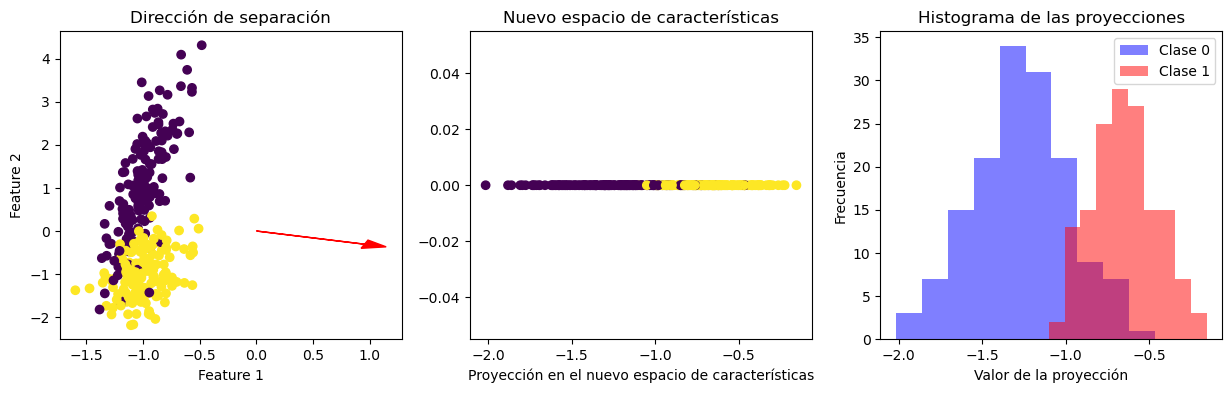

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Paso 1: Generar datos artificiales con n_classes clases
n_classes =2
X, y = make_classification(n_samples=300, n_features=2, n_classes=n_classes, n_clusters_per_class=1, n_redundant=0)


# Paso 2: Calcular las medias de las clases
class_means = [np.mean(X[y == i], axis=0) for i in range(n_classes)]

# Paso 3: Calcular la dispersión entre clases (SB)
overall_mean = np.mean(X, axis=0)
SB = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(class_means):
    n = X[y == i].shape[0]
    mean_diff = (mean_vec - overall_mean).reshape(-1, 1)
    SB += n * np.dot(mean_diff, mean_diff.T)

# Paso 4: Calcular la dispersión dentro de las clases (SW)    
SW = np.zeros((X.shape[1], X.shape[1]))
for i, mean_vec in enumerate(class_means):
    class_scatter = np.zeros((X.shape[1], X.shape[1]))
    X_class = X[y == i]
    SW += np.dot((X_class - mean_vec).T, (X_class - mean_vec))
       
# Paso 5: Calcular los eigenvectores y eigenvalores de SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(np.dot(np.linalg.inv(SW), SB))

# Paso 6: Ordenar los eigenvectores según los eigenvalores
idx = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, idx]

# Paso 7: Seleccionar el vector de pesos w correspondiente al eigenvalor más grande
w = eigenvectors_sorted[:, 0]

# Paso 8: Normalizar w para obtener un vector unitario
w /= np.linalg.norm(w)

# Paso 9: Proyectar los datos en el nuevo espacio de características
X_projected = np.dot(X, w)

# Paso 10: Visualizar los datos y la dirección de separación
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.arrow(0, 0, w[0], w[1], head_width=0.2, head_length=0.2, fc='r', ec='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dirección de separación')


plt.subplot(132)
plt.scatter(X_projected, np.zeros_like(X_projected), c=y, cmap='viridis')
plt.title('Nuevo espacio de características')
plt.xlabel('Proyección en el nuevo espacio de características')


plt.subplot(133)
plt.hist(X_projected[y == 0], color='b', alpha=0.5, label='Clase 0')
plt.hist(X_projected[y == 1], color='r', alpha=0.5, label='Clase 1')
plt.title('Histograma de las proyecciones')
plt.xlabel('Valor de la proyección')
plt.ylabel('Frecuencia')
plt.legend()

## Comparemos con el trabajo que realiza PCA

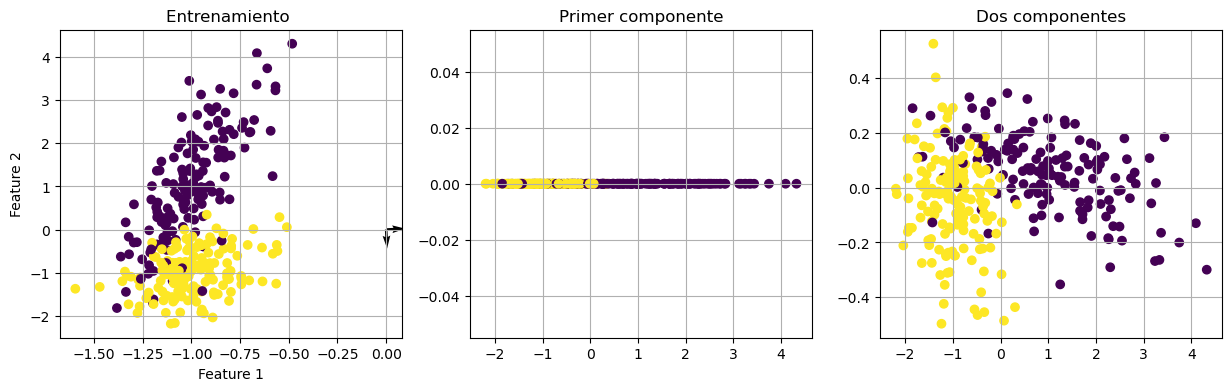

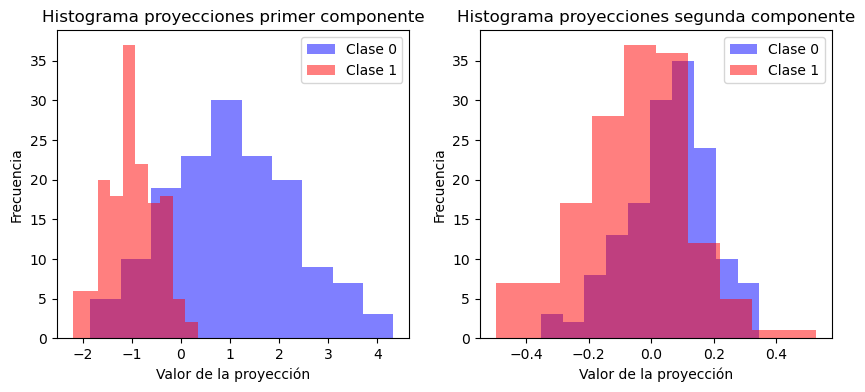

In [48]:
from sklearn.decomposition import PCA
# Fit on a PCA object
pca = PCA(n_components=2)

X_pca = pca.fit(X).transform(X)

plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Entrenamiento ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label="eigenvectors")
plt.grid(True)

plt.subplot(132)
plt.scatter(X_pca[:,0],np.zeros(X_pca[:,0].shape[0]),c=y,cmap='viridis')
plt.title("Primer componente")
plt.grid(True)


plt.subplot(133)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis')
plt.title("Dos componentes")
plt.grid(True)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.hist(X_pca[y == 0,0], color='b', alpha=0.5, label='Clase 0')
plt.hist(X_pca[y == 1,0], color='r', alpha=0.5, label='Clase 1')
plt.title('Histograma proyecciones primer componente')
plt.xlabel('Valor de la proyección')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(122)
plt.hist(X_pca[y == 0,1], color='b', alpha=0.5, label='Clase 0')
plt.hist(X_pca[y == 1,1], color='r', alpha=0.5, label='Clase 1')
plt.title('Histograma proyecciones segunda componente')
plt.xlabel('Valor de la proyección')
plt.ylabel('Frecuencia')
plt.legend()

## Usemos la implementación de SKLEARN

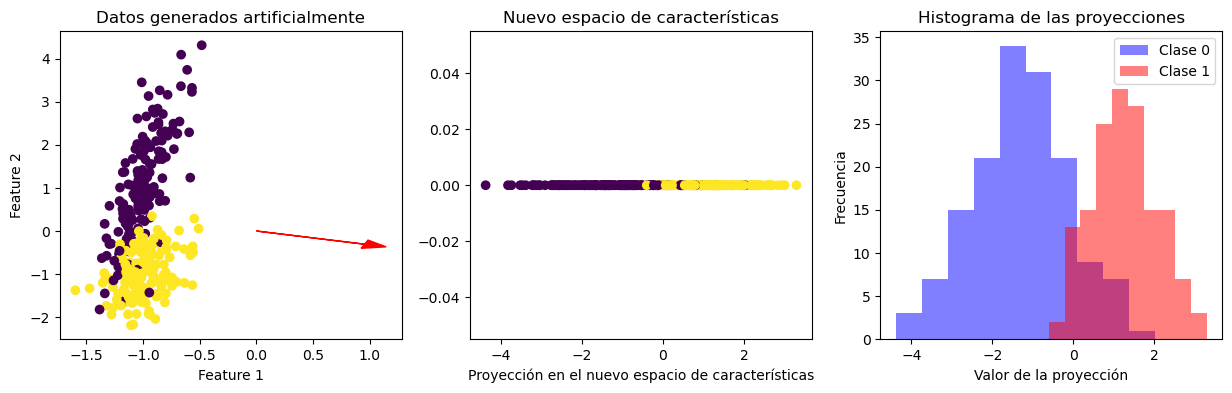

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

# calcular LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Visualizar los datos
plt.figure(figsize=(15, 4))
plt.subplot(131)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Datos generados artificialmente')

projection_direction = lda.coef_[0]
projection_direction /= np.linalg.norm(projection_direction)
# Graficar la dirección de proyección
plt.arrow(0, 0, projection_direction[0], projection_direction[1], head_width=0.2, head_length=0.2, fc='r', ec='r')

# Aplicar LDA
X_projected = lda.transform(X)

# Visualizar la separación de clases
plt.subplot(132)
plt.scatter(X_projected, np.zeros_like(X_projected), c=y, cmap='viridis')
plt.title('Nuevo espacio de características')
plt.xlabel('Proyección en el nuevo espacio de características')

plt.subplot(133)
plt.hist(X_projected[y == 0], color='b', alpha=0.5, label='Clase 0')
plt.hist(X_projected[y == 1], color='r', alpha=0.5, label='Clase 1')
plt.title('Histograma de las proyecciones')
plt.xlabel('Valor de la proyección')
plt.ylabel('Frecuencia')
plt.legend()
